In [1]:
# import the library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense,  Dropout
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix,accuracy_score


In [2]:
#loading data
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


(299, 13)

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

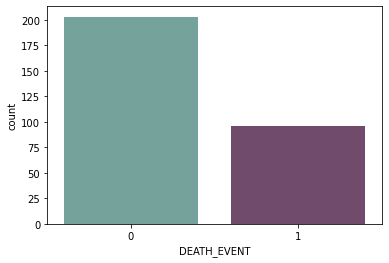

In [4]:
# evaluate the target and find out if our data is balanced or not
cols= ["#6daa9f","#774571"]
sns.countplot(x= data["DEATH_EVENT"], palette= cols)


In [5]:
X=data.drop(["DEATH_EVENT"],axis=1)
y=data["DEATH_EVENT"]

In [6]:
col_names = list(X.columns)
standard_scaler = preprocessing.StandardScaler() 
X_scale= standard_scaler.fit_transform(X)
X_scale = pd.DataFrame(X_scale, columns=col_names)   
X_scale.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1.192945,-0.871105,0.000166,-0.847579,-1.530560,1.359272,1.681648e-02,0.490057,-1.504036,0.735688,-0.687682,-1.629502
1,-0.491279,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976,0.735688,-0.687682,-1.603691
2,0.350833,-0.871105,-0.449939,-0.847579,-1.530560,-0.735688,-1.038073e+00,-0.090900,-1.731046,0.735688,1.454161,-1.590785
3,-0.912335,1.147968,-0.486071,-0.847579,-1.530560,-0.735688,-5.464741e-01,0.490057,0.085034,0.735688,-0.687682,-1.590785
4,0.350833,1.147968,-0.435486,1.179830,-1.530560,-0.735688,6.517986e-01,1.264666,-4.682176,-1.359272,-0.687682,-1.577879


In [7]:

X_train, X_test, y_train,y_test = train_test_split(X_scale,y,test_size=0.25,random_state=0)
X_train.shape

(224, 12)

In [8]:

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, 
    patience=30, 
    restore_best_weights=True)

In [9]:

model = Sequential()
model.add(Dense(units = 16, activation = 'relu', input_shape = (12,)))
model.add(Dropout(0.3))
model.add(Dense(units = 16,  activation = 'relu')) 
model.add(Dropout(0.3))

model.add(Dense(units = 8, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 1,  activation = 'sigmoid'))

In [10]:
# Compiling the ANN
# optimizer=’adam’: This parameter helps to find the optimum values of each weight in the neural network.
# use the binary_crossentropy in loss because is the binary classifcation 0 ,1
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# loss parameters tupe :
# 1- Regression: One neuron in the output layer (MSE)
# 2- Classification(Binary): Two neurons in the output layer (binary_crossentropy)
# 3- Classification(Multi-class): The number of neurons in the output layer is equal to the unique classes (cross entropy)

In [11]:
# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 500,callbacks=[early_stopping], validation_split=0.2)

# batch_size = 32 >>  mean that 32 rows will be passed to the Network in one go

Epoch 1/500


ValueError: in user code:

    File "C:\Users\khale\anaconda3\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\khale\anaconda3\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\khale\anaconda3\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\khale\anaconda3\lib\site-packages\keras\engine\training.py", line 860, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\khale\anaconda3\lib\site-packages\keras\engine\training.py", line 918, in compute_loss
        return self.compiled_loss(
    File "C:\Users\khale\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\khale\anaconda3\lib\site-packages\keras\losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\khale\anaconda3\lib\site-packages\keras\losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\khale\anaconda3\lib\site-packages\keras\losses.py", line 1932, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "C:\Users\khale\anaconda3\lib\site-packages\keras\backend.py", line 5247, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(labels=target, logits=output)

    ValueError: `logits` and `labels` must have the same shape, received ((None, 2) vs (None, 1)).


In [ ]:
# print the val_accuracy 
val_accuracy = np.max(history.history['val_accuracy'])
accuracy = np.mean(history.history['accuracy'])
print("\n%s: %.2f %% " % ('val_accuracy', val_accuracy*100))

In [ ]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5) 
test_data_accuracy = accuracy_score(y_pred, y_test)
print(f"test accuracy = {test_data_accuracy*100}" )

In [ ]:
history = pd.DataFrame(history.history)
history.head()

In [ ]:
pd.DataFrame(y_test)

In [ ]:
# test with one row in dataset
inputx=(1.192945,-0.871105,0.000166,-0.847579,-1.530560,1.359272,
        1.681648e-02,0.490057,-1.504036,0.735688,-0.687682,-1.629502)
# one raw in dataset

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(inputx)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction<= 0.5):
  print('Not Have Heart problems')
else:
  print('Have Heart problems')